In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [173]:
def soft_max(A):
    exp_X = np.exp(A - np.max(A, axis=1, keepdims=True))
    P = exp_X / exp_X.sum(axis = 1, keepdims = True)
    return P

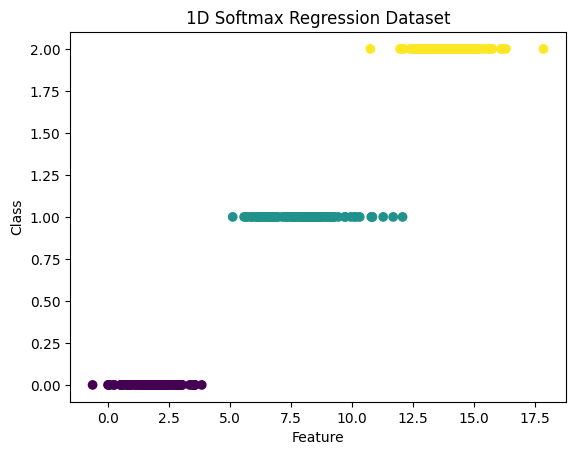

In [174]:
np.random.seed(42)
# Number of data points per class
num_points = 100
# Mean and standard deviation for each class
mean_class1, std_class1 = 2, 1
mean_class2, std_class2 = 8, 1.5
mean_class3, std_class3 = 14, 1
# Generate random data for each class
class1 = np.random.normal(mean_class1, std_class1, num_points)
class2 = np.random.normal(mean_class2, std_class2, num_points)
class3 = np.random.normal(mean_class3, std_class3, num_points)
# Combine data from all classes
X = np.concatenate([class1, class2, class3])
# Generate labels for each class
y_class1 = np.zeros(num_points)
y_class2 = np.ones(num_points)
y_class3 = 2 * np.ones(num_points)
# Combine labels from all classes
y = np.concatenate([y_class1, y_class2, y_class3])
# Shuffle the data
shuffle_indices = np.random.permutation(len(X))
X = X[shuffle_indices]
y = y[shuffle_indices]
# Plot the dataset
plt.scatter(X, y, marker='o', c=y, cmap=plt.cm.viridis)
plt.title('1D Softmax Regression Dataset')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.show()


In [175]:
b = np.ones(len(X)).reshape(-1,1)
X = X.reshape(num_points * 3, 1)
y = y.reshape(num_points * 3, 1)
X = np.concatenate((b, X), axis = 1)

In [176]:
encoder = OneHotEncoder()
y_old = y
y = encoder.fit_transform(y).toarray()

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((270, 2), (270, 3), (30, 2), (30, 3))

In [178]:
def multiclass_crossentropy(Y, P):
    return (-1) * np.sum(Y * np.log(P)) / P.shape[0]

In [179]:
epochs = 10000
W = np.random.rand(X.shape[1], y.shape[1])
history = []
learning_rate = 0.0002
for i in range(epochs):
    P = soft_max(X @ W)
    L = multiclass_crossentropy(y, P)
    history.append(L)
    dL = X.T @ (P - y)
    W = W - learning_rate * dL


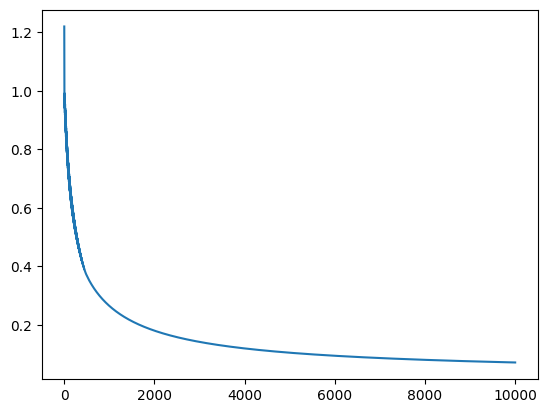

In [180]:
plt.plot(history)

In [181]:
y_pred = soft_max(X @ W)
y_pred = np.argmax(y_pred, axis=1)

In [182]:
accuracy_score(y_old, y_pred)

0.9866666666666667